In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sl

# Upload and Explore Data



In [2]:
df_tv=pd.read_csv("/Users/xinzhang/Downloads/tv.csv")
df_tv.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.6056,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.4264,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.8674,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.7210,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.6521,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [3]:
df_tv.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   video_id                       4226 non-null   int64  
 1   cvt_per_day                    4226 non-null   float64
 2   weighted_categorical_position  4226 non-null   int64  
 3   weighted_horizontal_poition    4226 non-null   int64  
 4   import_id                      4226 non-null   object 
 5   release_year                   4226 non-null   int64  
 6   genres                         4226 non-null   object 
 7   imdb_votes                     4226 non-null   int64  
 8   budget                         4226 non-null   int64  
 9   boxoffice                      4226 non-null   int64  
 10  imdb_rating                    4226 non-null   float64
 11  duration_in_mins               4226 non-null   float64
 12  metacritic_score               4226 non-null   i

In [4]:
df_tv.iloc[np.where(df_tv[['video_id','release_year']].duplicated())]

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category


In [5]:
df_tv=df_tv.drop(['video_id'],axis=1)

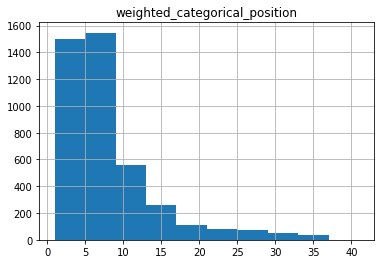

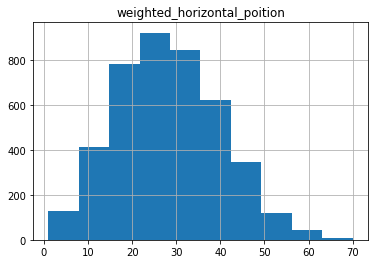

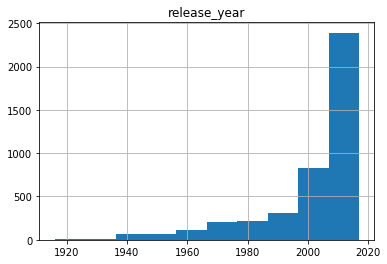

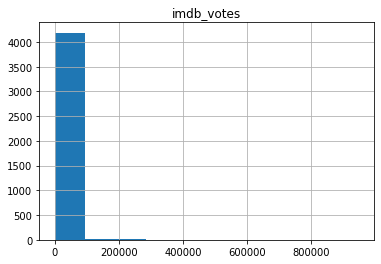

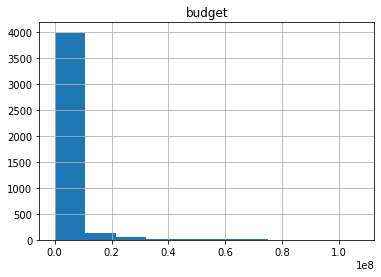

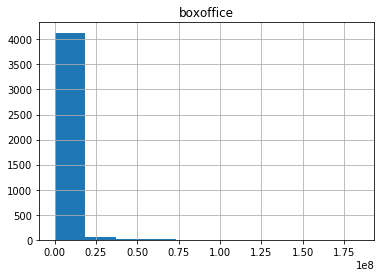

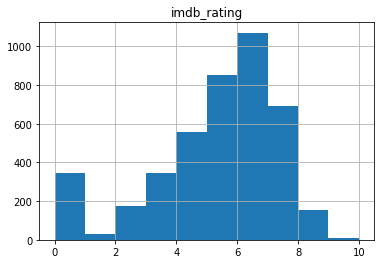

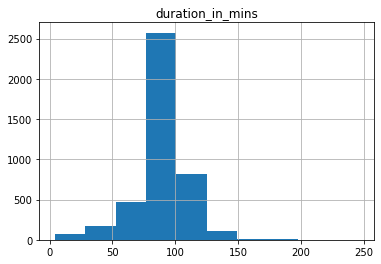

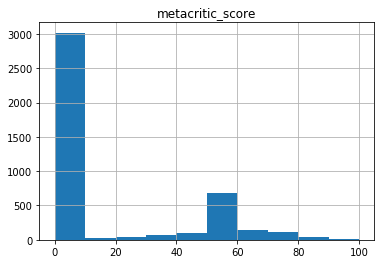

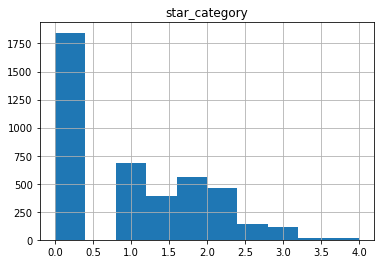

In [6]:
for x in df_tv.drop(['cvt_per_day'],axis=1).columns:
    if df_tv[x].dtypes == 'int64' or df_tv[x].dtypes == 'float64':
        df_tv.hist(column=x)
    

In [7]:
print(df_tv.drop(['release_year'],axis=1).describe(percentiles=[0.1,0.25,0.5,0.75,0.9]))

         cvt_per_day  weighted_categorical_position  \
count    4226.000000                    4226.000000   
mean     4218.630239                       7.782537   
std     13036.079963                       6.134183   
min         2.187625                       1.000000   
10%       141.984913                       3.000000   
25%       351.168776                       4.000000   
50%      1193.499988                       6.000000   
75%      3356.788816                       9.000000   
90%      7930.121453                      15.000000   
max    307127.605600                      41.000000   

       weighted_horizontal_poition     imdb_votes        budget     boxoffice  \
count                  4226.000000    4226.000000  4.226000e+03  4.226000e+03   
mean                     28.103644    6462.924042  2.150743e+06  2.536338e+06   
std                      11.863649   31596.006790  7.176604e+06  8.243516e+06   
min                       1.000000       0.000000  0.000000e+00  0.000

In [8]:
#Hom many 0 in each column
(df_tv==0).sum(axis=0)

cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64

In [9]:
"""boxoffice and metacritic_score are missing more than 70% of all data (if don't want to delete, try random forrest
to impute values here)
delete these columns"""
df_tv=df_tv.drop(['boxoffice','metacritic_score'],axis=1)

In [10]:
df_tv.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,imdb_rating,duration_in_mins,awards,mpaa,star_category
0,307127.6056,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,6.5,112.301017,other award,PG-13,1.710000
1,270338.4264,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,6.5,94.983250,no award,R,3.250000
2,256165.8674,1,3,other,2012,"Crime,Drama",197596,26000000,7.3,115.763675,other award,R,2.646667
3,196622.7210,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,7.6,130.703583,Oscar,R,1.666667
4,159841.6521,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,6.4,105.545533,other award,R,3.066667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7fbb603090>]],
      dtype=object)

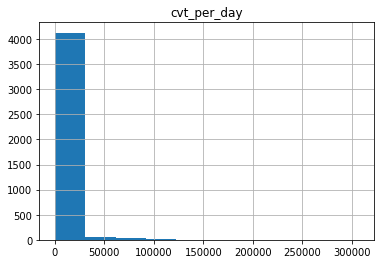

In [11]:
#Plot y: Histograms, bins
df_tv.hist(['cvt_per_day'])

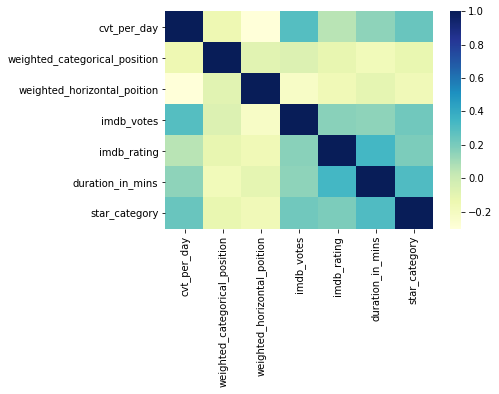

In [12]:
#Correlation heat map
corr = df_tv[['cvt_per_day','weighted_categorical_position','weighted_horizontal_poition', 'imdb_votes','imdb_rating', 
               'duration_in_mins','star_category']].corr()

sns.heatmap(corr, cmap="YlGnBu")

# Data Preprocessing

In [13]:
df_tv=df_tv.replace(0,np.nan)

In [14]:
df_tv['imdb_rating'].fillna(df_tv['imdb_rating'].mean(),inplace=True)
df_tv['budget'].fillna(df_tv['budget'].mean(),inplace=True)
df_tv['star_category'].fillna(df_tv['star_category'].mean(),inplace=True)

In [15]:
df_tv['imdb_votes'].fillna(df_tv['imdb_votes'].mean(),inplace=True)
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   import_id                      4226 non-null   object 
 4   release_year                   4226 non-null   int64  
 5   genres                         4226 non-null   object 
 6   imdb_votes                     4226 non-null   float64
 7   budget                         4226 non-null   float64
 8   imdb_rating                    4226 non-null   float64
 9   duration_in_mins               4226 non-null   float64
 10  awards                         4226 non-null   object 
 11  mpaa                           4226 non-null   object 
 12  star_category                  4226 non-null   f

In [16]:
df_tv['import_id'].unique()

array(['lionsgate', 'other', 'mgm', 'paramount'], dtype=object)

In [17]:
pd.get_dummies(df_tv.import_id)

,lionsgate,mgm,other,paramount
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
4221,0,0,1,0
4222,0,0,1,0
4223,0,0,1,0
4224,0,0,1,0


In [18]:
import_id_dummies=pd.get_dummies(df_tv.import_id)
df_tv=pd.concat([df_tv,import_id_dummies],axis=1)
df_tv=df_tv.drop(['import_id'],axis=1)

In [19]:
df_tv=df_tv.drop(['lionsgate'],axis=1)

In [20]:
df_tv['awards'].value_counts()

no award        2569
other award     1453
Oscar            141
Golden Globe      44
BAFTA             19
Name: awards, dtype: int64

In [21]:
df_tv['awards'].replace({'Oscar': 'big award', 'Golden Globe':'big award', 'BAFTA':'big award'},inplace=True)
df_tv['awards'].value_counts() 

no award       2569
other award    1453
big award       204
Name: awards, dtype: int64

In [22]:
awards_dummies=pd.get_dummies(df_tv.awards)
df_tv=pd.concat([df_tv,awards_dummies],axis=1)
df_tv=df_tv.drop(['awards'],axis=1)

In [23]:
df_tv = df_tv.drop(['big award'],axis=1)

In [24]:
df_tv

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,genres,imdb_votes,budget,imdb_rating,duration_in_mins,mpaa,star_category,mgm,other,paramount,no award,other award
0,307127.605600,1,3,2013,"Action,Thriller,Drama",69614.000000,1.500000e+07,6.500000,112.301017,PG-13,1.710000,0,0,0,0,1
1,270338.426400,1,3,2013,"Comedy,Crime,Thriller",46705.000000,1.500000e+07,6.500000,94.983250,R,3.250000,0,0,0,1,0
2,256165.867400,1,3,2012,"Crime,Drama",197596.000000,2.600000e+07,7.300000,115.763675,R,2.646667,0,1,0,0,1
3,196622.721000,3,4,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339.000000,1.500000e+07,7.600000,130.703583,R,1.666667,0,0,0,0,0
4,159841.652100,1,3,2013,"Crime,Thriller,Mystery,Documentary",46720.000000,2.722000e+07,6.400000,105.545533,R,3.066667,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,9.726396,3,32,2010,"Comedy,Drama",14.000000,5.129256e+06,7.800000,4.311600,NotRated,1.700000,0,1,0,1,0
4222,7.912698,29,35,2013,Music,7035.630345,5.129256e+06,5.722952,4.878900,PG-13,1.695107,0,1,0,1,0
4223,2.935691,3,27,2008,Comedy,505.000000,5.129256e+06,7.100000,110.350000,NotRated,1.695107,0,1,0,0,1
4224,2.866614,4,15,2003,Documentary,5.000000,1.000000e+05,6.000000,79.633333,NotRated,1.695107,0,1,0,1,0


In [25]:
df_tv['mpaa'].value_counts()

NotRated    2158
R           1158
PG-13        426
PG           353
G            125
NC-17          6
Name: mpaa, dtype: int64

In [26]:
df_tv['mpaa'].replace({'PG-13': 'PG', 'G':'PG', 'NC-17':'PG'},inplace=True)

In [27]:
df_tv['mpaa'].value_counts()

NotRated    2158
R           1158
PG           910
Name: mpaa, dtype: int64

In [28]:
mpaa_dummies=pd.get_dummies(df_tv.mpaa)
df_tv=pd.concat([df_tv,mpaa_dummies],axis=1)
df_tv=df_tv.drop(['mpaa','NotRated'],axis=1)

In [29]:
df_tv_gener=df_tv.copy()

In [30]:
df_tv_gener

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,genres,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,mgm,other,paramount,no award,other award,PG,R
0,307127.605600,1,3,2013,"Action,Thriller,Drama",69614.000000,1.500000e+07,6.500000,112.301017,1.710000,0,0,0,0,1,1,0
1,270338.426400,1,3,2013,"Comedy,Crime,Thriller",46705.000000,1.500000e+07,6.500000,94.983250,3.250000,0,0,0,1,0,0,1
2,256165.867400,1,3,2012,"Crime,Drama",197596.000000,2.600000e+07,7.300000,115.763675,2.646667,0,1,0,0,1,0,1
3,196622.721000,3,4,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339.000000,1.500000e+07,7.600000,130.703583,1.666667,0,0,0,0,0,0,1
4,159841.652100,1,3,2013,"Crime,Thriller,Mystery,Documentary",46720.000000,2.722000e+07,6.400000,105.545533,3.066667,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,9.726396,3,32,2010,"Comedy,Drama",14.000000,5.129256e+06,7.800000,4.311600,1.700000,0,1,0,1,0,0,0
4222,7.912698,29,35,2013,Music,7035.630345,5.129256e+06,5.722952,4.878900,1.695107,0,1,0,1,0,1,0
4223,2.935691,3,27,2008,Comedy,505.000000,5.129256e+06,7.100000,110.350000,1.695107,0,1,0,0,1,0,0
4224,2.866614,4,15,2003,Documentary,5.000000,1.000000e+05,6.000000,79.633333,1.695107,0,1,0,1,0,0,0


Action                    739
Adult                       3
Adventure                 363
Animation                 129
Anime                      11
Comedy                   1184
Crime                     437
Documentary               671
Drama                    1677
Fantasy                   243
Foreign/International      64
Holiday                     1
Horror                    762
Independent               393
Kids & Family             280
LGBT                        2
Lifestyle                   7
Music                     171
Musicals                   68
Mystery                   375
Reality                     9
Romance                   591
Sci-Fi                    363
Sport                      77
Thriller                  879
War                       102
Western                   102
dtype: int64


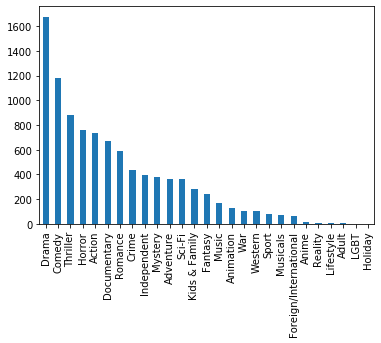

In [31]:
gen_split = df_tv_gener['genres'].str.get_dummies(sep=',').sum()
print(gen_split)

gen_split.sort_values(ascending=False).plot.bar()

In [32]:
gener=df_tv_gener['genres'].str.get_dummies(sep=',').astype(np.int64)

In [33]:
df_tv_gener['genres'].str.get_dummies(sep=',')

,Action,Adult,Adventure,Animation,Anime,Comedy,Crime,Documentary,Drama,Fantasy,...,Music,Musicals,Mystery,Reality,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4222,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4223,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4224,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
gener['Misc_genres']=gener['Anime']|gener['Reality']|gener['Lifestyle']|gener['Adult']|gener['LGBT']|gener['Holiday']

In [35]:
gener.drop(['Anime', 'Reality','Lifestyle', 'Adult','LGBT','Holiday'], inplace=True, axis=1)

In [36]:
df_tv_gener = pd.concat([df_tv_gener,gener],axis=1)

In [37]:
df_tv_gener.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,genres,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,...,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres
0,307127.6056,1,3,2013,"Action,Thriller,Drama",69614.0,15000000.0,6.5,112.301017,1.710000,...,0,0,0,0,0,0,1,0,0,0
1,270338.4264,1,3,2013,"Comedy,Crime,Thriller",46705.0,15000000.0,6.5,94.983250,3.250000,...,0,0,0,0,0,0,1,0,0,0
2,256165.8674,1,3,2012,"Crime,Drama",197596.0,26000000.0,7.3,115.763675,2.646667,...,0,0,0,0,0,0,0,0,0,0
3,196622.7210,3,4,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339.0,15000000.0,7.6,130.703583,1.666667,...,0,0,1,0,0,0,1,1,0,0
4,159841.6521,1,3,2013,"Crime,Thriller,Mystery,Documentary",46720.0,27220000.0,6.4,105.545533,3.066667,...,0,0,1,0,0,0,1,0,0,0


In [38]:
df_tv_gener=df_tv_gener.drop(['genres'],axis=1)

In [39]:
df_preprocess = df_tv_gener.copy()

In [40]:
df_preprocess

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,mgm,...,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Misc_genres
0,307127.605600,1,3,2013,69614.000000,1.500000e+07,6.500000,112.301017,1.710000,0,...,0,0,0,0,0,0,1,0,0,0
1,270338.426400,1,3,2013,46705.000000,1.500000e+07,6.500000,94.983250,3.250000,0,...,0,0,0,0,0,0,1,0,0,0
2,256165.867400,1,3,2012,197596.000000,2.600000e+07,7.300000,115.763675,2.646667,0,...,0,0,0,0,0,0,0,0,0,0
3,196622.721000,3,4,2008,356339.000000,1.500000e+07,7.600000,130.703583,1.666667,0,...,0,0,1,0,0,0,1,1,0,0
4,159841.652100,1,3,2013,46720.000000,2.722000e+07,6.400000,105.545533,3.066667,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,9.726396,3,32,2010,14.000000,5.129256e+06,7.800000,4.311600,1.700000,0,...,0,0,0,0,0,0,0,0,0,0
4222,7.912698,29,35,2013,7035.630345,5.129256e+06,5.722952,4.878900,1.695107,0,...,1,0,0,0,0,0,0,0,0,0
4223,2.935691,3,27,2008,505.000000,5.129256e+06,7.100000,110.350000,1.695107,0,...,0,0,0,0,0,0,0,0,0,0
4224,2.866614,4,15,2003,5.000000,1.000000e+05,6.000000,79.633333,1.695107,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Bucketize release_year
df_preprocess['release_year'].quantile([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

0.0    1916.0
0.1    1974.0
0.2    1991.0
0.3    2001.0
0.4    2006.0
0.5    2008.0
0.6    2010.0
0.7    2012.0
0.8    2013.0
0.9    2014.0
1.0    2017.0
Name: release_year, dtype: float64

In [42]:
# Bin of year
bin_year=[1916,1974,1991,2001,2006,2008,2010,2012,2013,2014,2017]

#Create bins [1916,1974],(1974,1991],(1991,2001] ...
labels=['1916-1974','1974-1991','1991-2001','2001-2006','2006-2008','2008-2010','2010-2012','2012-2013','2013-2014',
        '2014-2017']
df_preprocess['release_year']=pd.cut(df_preprocess['release_year'],bins=bin_year,labels=labels)


In [43]:
#create dummy variable for year
year_dummies=pd.get_dummies(df_preprocess['release_year'])
year_dummies=year_dummies.drop(['1916-1974'],axis=1)


In [44]:
df_preprocess = pd.concat([df_preprocess,year_dummies],axis=1)
df_preprocess = df_preprocess.drop(['release_year'],axis=1)
df_preprocess

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,mgm,other,...,Misc_genres,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.605600,1,3,69614.000000,1.500000e+07,6.500000,112.301017,1.710000,0,0,...,0,0,0,0,0,0,0,1,0,0
1,270338.426400,1,3,46705.000000,1.500000e+07,6.500000,94.983250,3.250000,0,0,...,0,0,0,0,0,0,0,1,0,0
2,256165.867400,1,3,197596.000000,2.600000e+07,7.300000,115.763675,2.646667,0,1,...,0,0,0,0,0,0,1,0,0,0
3,196622.721000,3,4,356339.000000,1.500000e+07,7.600000,130.703583,1.666667,0,0,...,0,0,0,0,1,0,0,0,0,0
4,159841.652100,1,3,46720.000000,2.722000e+07,6.400000,105.545533,3.066667,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,9.726396,3,32,14.000000,5.129256e+06,7.800000,4.311600,1.700000,0,1,...,0,0,0,0,0,1,0,0,0,0
4222,7.912698,29,35,7035.630345,5.129256e+06,5.722952,4.878900,1.695107,0,1,...,0,0,0,0,0,0,0,1,0,0
4223,2.935691,3,27,505.000000,5.129256e+06,7.100000,110.350000,1.695107,0,1,...,0,0,0,0,1,0,0,0,0,0
4224,2.866614,4,15,5.000000,1.000000e+05,6.000000,79.633333,1.695107,0,1,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cvt_per_day                    4226 non-null   float64
 1   weighted_categorical_position  4226 non-null   int64  
 2   weighted_horizontal_poition    4226 non-null   int64  
 3   imdb_votes                     4226 non-null   float64
 4   budget                         4226 non-null   float64
 5   imdb_rating                    4226 non-null   float64
 6   duration_in_mins               4226 non-null   float64
 7   star_category                  4226 non-null   float64
 8   mgm                            4226 non-null   uint8  
 9   other                          4226 non-null   uint8  
 10  paramount                      4226 non-null   uint8  
 11  no award                       4226 non-null   uint8  
 12  other award                    4226 non-null   u

# Model Building

In [46]:
"""if you have outliers in your feature (column), normalizing your data will scale most of the data to a small 
interval, which means all features will have the same scale but does not handle outliers well. Standardisation is 
more robust to outliers, and in many cases, it is preferable over Max-Min Normalisation."""
#Scaling first then split to training and testing dataset
df_scale=df_preprocess.copy()

In [47]:
df_scale.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,mgm,other,...,Misc_genres,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.6056,1,3,69614.0,15000000.0,6.5,112.301017,1.710000,0,0,...,0,0,0,0,0,0,0,1,0,0
1,270338.4264,1,3,46705.0,15000000.0,6.5,94.983250,3.250000,0,0,...,0,0,0,0,0,0,0,1,0,0
2,256165.8674,1,3,197596.0,26000000.0,7.3,115.763675,2.646667,0,1,...,0,0,0,0,0,0,1,0,0,0
3,196622.7210,3,4,356339.0,15000000.0,7.6,130.703583,1.666667,0,0,...,0,0,0,0,1,0,0,0,0,0
4,159841.6521,1,3,46720.0,27220000.0,6.4,105.545533,3.066667,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
scale_lst=['weighted_categorical_position','weighted_horizontal_poition','imdb_votes','budget','imdb_rating','duration_in_mins','star_category']

In [49]:
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
sc_scale = preprocessing.StandardScaler().fit(df_scale[scale_lst])
df_scale[scale_lst]=sc_scale.transform(df_scale[scale_lst])
df_scale.head()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,imdb_rating,duration_in_mins,star_category,mgm,other,...,Misc_genres,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,307127.6056,-1.105826,-2.116264,1.984496,1.470049,0.541892,1.078791,0.032892,0,0,...,0,0,0,0,0,0,0,1,0,0
1,270338.4264,-1.105826,-2.116264,1.258002,1.470049,0.541892,0.257409,3.434028,0,0,...,0,0,0,0,0,0,0,1,0,0
2,256165.8674,-1.105826,-2.116264,6.043083,3.108277,1.099791,1.243025,2.101548,0,1,...,0,0,0,0,0,0,1,0,0,0
3,196622.7210,-0.779746,-2.031963,11.077168,1.470049,1.309003,1.951625,-0.062811,0,0,...,0,0,0,0,1,0,0,0,0,0
4,159841.6521,-1.105826,-2.116264,1.258478,3.289972,0.472155,0.758378,3.029131,0,0,...,0,0,0,0,0,0,0,1,0,0


# Model Training

In [50]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df_scale, test_size = 0.15, random_state = 5)

# LASSO Regression

In [51]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

In [52]:
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

In [53]:
lr_train.shape

(3053, 46)

In [54]:
lr_train_x=lr_train.drop(['cvt_per_day'],axis = 1)
lr_validate_x=lr_validate.drop(['cvt_per_day'],axis = 1)
lr_train_y=lr_train['cvt_per_day']
lr_validate_y=lr_validate['cvt_per_day']

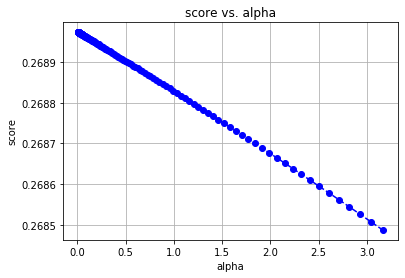

In [55]:
alphas = np.logspace (-2, 0.5, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')

for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x,lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)

    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas,scores,color='b', linestyle='dashed', marker='o',markerfacecolor='blue',markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
model1_para = opt_a

In [56]:
#Since score is maximize when alpha around 0, no penalties. Linear regression is enough.

# Random Forest Regression

In [57]:
model_train_x = train.drop(['cvt_per_day'], axis = 1)
model_test_x = test.drop(['cvt_per_day'], axis = 1)
model_train_y = train['cvt_per_day']
model_test_y = test['cvt_per_day']

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=2,max_features='sqrt',n_jobs=-1)
param_grid={'n_estimators':[45,46,47,48,49,50,51,52,53,54,55],'max_depth':[15,16,17,18,19,20,21]}
clf=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,refit=True,n_jobs=-1,pre_dispatch='2*n_jobs')
clf.fit(model_train_x,model_train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1

{'mean_fit_time': array([0.33833604, 0.33989339, 0.30249743, 0.30218682, 0.29555225,
       0.25926342, 0.25591192, 0.25795727, 0.25893807, 0.2552371 ,
       0.28682437, 0.21358676, 0.15570712, 0.32295356, 0.28720107,
       0.27652936, 0.25860868, 0.27428107, 0.31017337, 0.33550477,
       0.2808681 , 0.27451015, 0.25120678, 0.24254088, 0.24956021,
       0.28846865, 0.33252282, 0.35166302, 0.31372805, 0.3584424 ,
       0.34172859, 0.34693098, 0.34403787, 0.36131096, 0.31427174,
       0.28087192, 0.34883246, 0.32721853, 0.32595301, 0.34043589,
       0.31672974, 0.38216329, 0.36244473, 0.34028635, 0.32812142,
       0.30834408, 0.30595064, 0.36549191, 0.32477293, 0.34078779,
       0.35781865, 0.32386127, 0.37404323, 0.37823343, 0.3880302 ,
       0.33401814, 0.31805148, 0.31282721, 0.27180238, 0.2958488 ,
       0.35127802, 0.33896565, 0.26502013, 0.40090752, 0.35960264,
       0.32337127, 0.317167  , 0.31567678, 0.26822886, 0.32799911,
       0.3585784 , 0.33196754, 0.27693563, 0

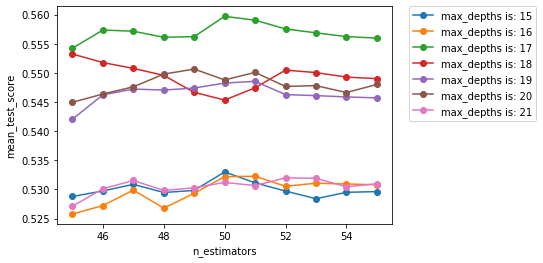

the best parameter for max_depth is: 17
the best parameter for n_estimators is: 50


In [59]:
result=clf.cv_results_
print(result)
max_depth=[15,16,17,18,19,20,21]
n_estimators=[45,46,47,48,49,50,51,52,53,54,55]
scores=clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i,j in enumerate(max_depth):
    plt.plot(n_estimators,scores[i],'-o',label='max_depths is: '+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('n_estimators')
plt.ylabel('mean_test_score')
plt.show()
print('the best parameter for max_depth is: '+str(clf.best_params_['max_depth']))
print('the best parameter for n_estimators is: '+str(clf.best_params_['n_estimators']))

# Evaluate Model

In [60]:
train_x = model_train_x 
test_x = model_test_x
train_y = model_train_y
test_y = model_test_y

In [61]:
#For Lasso
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha=model1_para)
lasso.fit(train_x,train_y)
pred_y=lasso.predict(test_x)
lasso_score=lasso.score(test_x,test_y)
MSE_lasso=mean_squared_error(test_y,pred_y)
RMSE_lasso=np.sqrt(MSE_lasso)
print('lasso score: ', lasso_score)
print('Mean square error of lasso: ', MSE_lasso)
print('Root mean square error of lasso: ', RMSE_lasso)

lasso score:  0.19185469939980115
Mean square error of lasso:  169303998.2726289
Root mean square error of lasso:  13011.686987959283


In [62]:
#For random forest regression
rf=RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'],max_depth=clf.best_params_['max_depth'],max_features='sqrt',random_state=2,n_jobs=-1)
rf.fit(train_x,train_y)
pred_y=rf.predict(test_x)
rf_score=rf.score(test_x,test_y)
MSE_rf=mean_squared_error(test_y,pred_y)
RMSE_rf=np.sqrt(MSE_rf)
print('rf score: ', rf_score)
print('Mean of square error of rf: ',MSE_rf)
print('Root mean square error of rf: ', RMSE_rf)

rf score:  0.42950650555899517
Mean of square error of rf:  119516663.06251134
Root mean square error of rf:  10932.367678710378
